# CASA0007_QM Assignment 1 - Group Project (G.13)

## Topic (Alternative)

Road Traffic Accidents

## Research Question



## References
1. [Collisions and incidents](https://www.met.police.uk/advice/advice-and-information/rs/road-safety/collisions/)
2. [Traffic violations analysis](https://www.kaggle.com/code/rounak041993/traffic-violations-analysis)
3. [Regression, EDA, and Statistics Tutorial](https://www.kaggle.com/code/grosvenpaul/regression-eda-and-statistics-tutorial)
4. [Road Traffic Analysis and Identification of Black Spot Locations on Highway](https://www.researchgate.net/publication/347255620_Road_Traffic_Accident_Analysis_and_Identification_of_Black_Spot_Locations_on_Highway)
5. [Analysis of Road Traffic Accidents and Implications for Road Safety Evidence from a Public Transportation System in a non-Western Setting](https://www.researchgate.net/publication/363257979_Analysis_of_road_traffic_accidents_and_implications_for_road_safety_Evidence_from_a_public_transportation_system_in_a_non-Western_Setting)

## Data

1. [Road Safety Data (gov)](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)
2. [Road Safety Data (TfL)](https://tfl.gov.uk/corporate/publications-and-reports/road-safety#on-this-page-1)
3. [London digital speed limit map](https://content.tfl.gov.uk/london-digital-speed-limit-map.pdf)
notes: data provided are from 1979-2021
4. [A&E Attendances and Emergency Admissions 2020-21](https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/ae-attendances-and-emergency-admissions-2020-21/)

Spatial data? (LondonBorough, LondonWard)
1. [London Borough](https://opendata.arcgis.com/datasets/8edafbe3276d4b56aec60991cbddda50_4.geojson)
2. [London Ward](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
3. [Accident and Emergency (A&E) current distribution in London](https://myhealth.london.nhs.uk/services/urgent-care-london-walk-in-centres/accident-and-emergency-ae/)

## Constraints

1. Location: London
2. Timeframe: events in the last 10 years? 2011-2021
3. Objects: Fatality, Seriously injured, death threatens accidents
4. Correlation: seasonal/heatwave?

## Methods
1. Road Safety Data/Road Violation Data EDA

2. Regression:
- Dependent variable: number of accidents/casualties
- Independent variable: seasons, speed limit, vehicles/pedestrians/cyclists
3. Clustering
- Accidents happens in every neighborhood/Ward
- Base map: London Ward
4. Linear programming: Recommendation/optimization of A&E center in London
- Base map: London Ward

## Output



## Discussion

## Conclusion

## Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# function area

def get_chisquare_table(field1, field2):
    # input 2 field
    result = [[],[]]
    return result

In [2]:
# load the csv
csv = pd.read_csv("./data/road/dft-road-casualty-statistics-accident-1979-2021.csv")

C:\Users\29425\AppData\Local\Temp\ipykernel_12672\3594476740.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/road/dft-road-casualty-statistics-accident-1979-2021.csv")


In [4]:
# show the top of the data
# csv.head()
# show the bottom of the data
# csv.tail()

# show the basic information of the scv
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [5]:
# show the name of columns 
csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [6]:
# filtering the data 
cases_in_2000 = csv.query("accident_year == 2000")

cases_in_2000

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
5118264,2000010SU0982,2000,010SU0982,522270.0,200330.0,-0.232572,51.688371,1,3,4,...,0,1,1,1,0,0,2,1,1,E01023584
5118265,2000010SU0983,2000,010SU0983,536010.0,204970.0,-0.032110,51.726908,1,3,2,...,0,1,1,1,0,0,2,1,2,E01023310
5118266,2000010SU0984,2000,010SU0984,519480.0,204200.0,-0.271588,51.723752,1,3,4,...,0,1,1,1,0,0,2,1,2,E01023584
5118267,2000010SU0985,2000,010SU0985,520760.0,202280.0,-0.253731,51.706222,1,3,3,...,0,1,1,1,0,0,2,1,1,E01023584
5118268,2000010SU0986,2000,010SU0986,523250.0,199890.0,-0.218557,51.684203,1,3,3,...,0,1,1,1,0,0,2,1,1,E01023584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351988,2000984050800,2000,984050800,316300.0,573100.0,-3.311492,55.045352,98,2,1,...,0,6,5,2,0,0,2,1,-1,-1
5351989,2000984051500,2000,984051500,313400.0,613000.0,-3.369120,55.403295,98,2,2,...,0,4,1,1,0,0,2,1,-1,-1
5351990,2000984051800,2000,984051800,324020.0,566030.0,-3.188818,54.983074,98,3,1,...,0,1,1,1,0,0,2,1,-1,-1
5351991,2000984052100,2000,984052100,307450.0,531980.0,-3.436759,54.674372,98,3,2,...,0,1,6,4,0,0,2,1,-1,-1


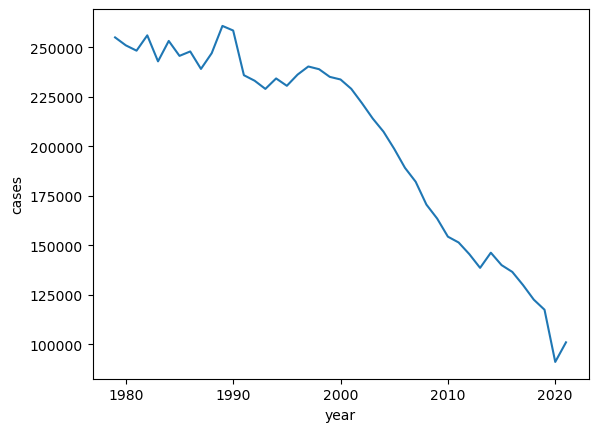

In [7]:
# calculate the case number of each year
cases_eachyear = csv["accident_year"].value_counts()

cases_eachyear = pd.DataFrame({
    "accident_year": cases_eachyear.index,
    "cases_number":  cases_eachyear.values
}).sort_values("accident_year")

# plot the relationship
plt.xlabel('year')
plt.ylabel('cases')

plt.plot(cases_eachyear["accident_year"],cases_eachyear["cases_number"])


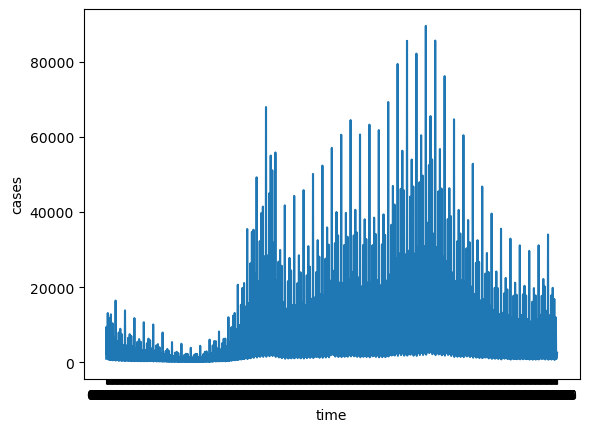

In [8]:
# calculate the case number in one day
cases_oneday = csv["time"].value_counts()

cases_oneday = pd.DataFrame({
    "time": cases_oneday.index,
    "cases_number":  cases_oneday.values
}).sort_values("time")

# plot the relationship
plt.xlabel('time')
plt.ylabel('cases')

plt.plot(cases_oneday["time"],cases_oneday["cases_number"])

In [ ]:
# calculate the case number by district
cases_oneday = csv["time"].value_counts()

cases_oneday = pd.DataFrame({
    "time": cases_oneday.index,
    "cases_number":  cases_oneday.values
}).sort_values("time")

# plot the relationship
plt.xlabel('time')
plt.ylabel('cases')

plt.plot(cases_oneday["time"],cases_oneday["cases_number"])

## Hypothesis Testing

H0: The bad condition of road will lead to traffic accident in rainy weahter.

H1: -H0


|weather_conditions:|road_surface_conditions:|light_conditions:|
|-|-|-|
|1	Fine no high winds |1	Dry|1	Daylight
|2	Raining no high winds|2	Wet or damp||
|3	Snowing no high winds|3	Snow||
|4	Fine + high winds|4	Frost or ice|4	Darkness - lights lit|
|5	Raining + high winds|5	Flood over 3cm. deep|5	Darkness - lights unlit|
|6	Snowing + high winds|6	Oil or diesel|6	Darkness - no lighting|
|7	Fog or mist|7	Mud|7	Darkness - lighting unknown|
|8	Other|||
|9	Unknown|9	unknown (self reported)||
|-1	Data missing or out of range|-1	Data missing or out of range||



In [ ]:
# chi-square testing





